# **FIONA HARIA | 60009220048 | D1-2 | D040**

# **Importing Libraries**

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Reading images from the covid-19 dataset**

In [65]:
img=cv2.imread('/content/094.png')

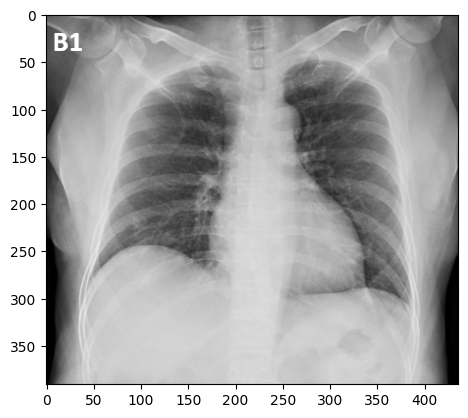

In [66]:
plt.imshow(img)

# **High Pass Filter**

In [76]:
def high_pass_filter(img, kern):
    k_size = kern.shape[0]
    if img.ndim == 2:
        rows, cols = img.shape
        high_pass_image = np.zeros((rows - k_size + 1, cols - k_size + 1))

        for x in range(high_pass_image.shape[0]):
            for y in range(high_pass_image.shape[1]):
                region = img[x:x + k_size, y:y + k_size]
                high_pass_image[x, y] = np.sum(region * kern)

    elif img.ndim == 3:
        rows, cols, num_channels = img.shape
        high_pass_image = np.zeros((rows - k_size + 1, cols - k_size + 1, num_channels))

        for ch in range(num_channels):
            for x in range(high_pass_image.shape[0]):
                for y in range(high_pass_image.shape[1]):
                    region = img[x:x + k_size, y:y + k_size, ch]
                    high_pass_image[x, y, ch] = np.sum(region * kern)

    return high_pass_image


# **Adding Padding**

In [77]:
def add_padding(image, pad_size=1):
    if len(image.shape) == 2:
        return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='constant')
    elif len(image.shape) == 3:
        return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')

# **Original Image V/S High Pass Filter Image**

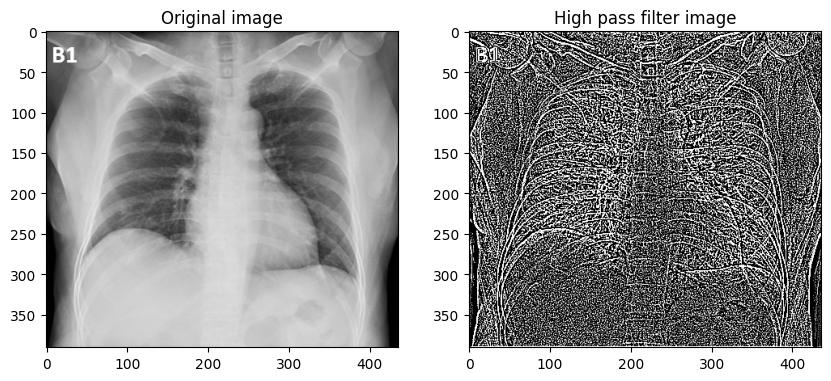

In [75]:
kernel = np.array([[-1/9, -1/9, -1/9],
                   [-1/9, 8/9, -1/9],
                   [-1/9, -1/9, -1/9]])

pad_image = add_padding(img)
high_pass_image = high_pass_filter(pad_image, kernel)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("High pass filter image")
plt.imshow(high_pass_image)
plt.show()

# **High Boost Filter**

In [78]:
def highboost_filter(kernel_output, highpass_image, A):
    return (A - 1) * kernel_output + highpass_image

# **When A=1**

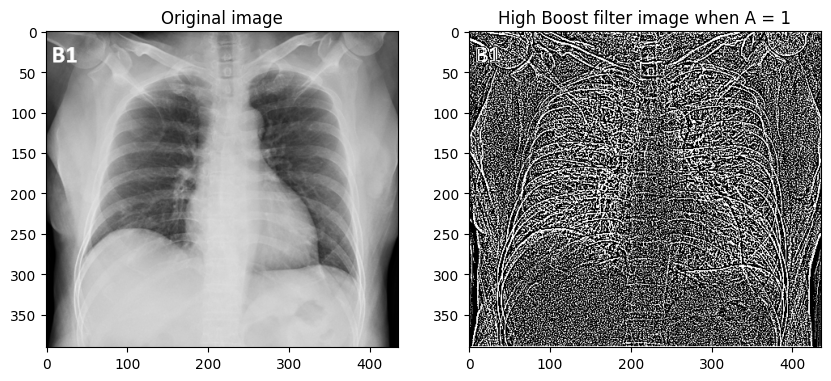

In [79]:
A = 1
kernel_image = high_pass_filter(pad_image, kernel)
high_boost_image = highboost_filter(kernel_image,high_pass_image, A)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("High Boost filter image when A = 1")
plt.imshow(high_boost_image)
plt.show()

## **We can observe that when A=1, the output image is the same as that of the high pass image above**

# **When A=1.5**

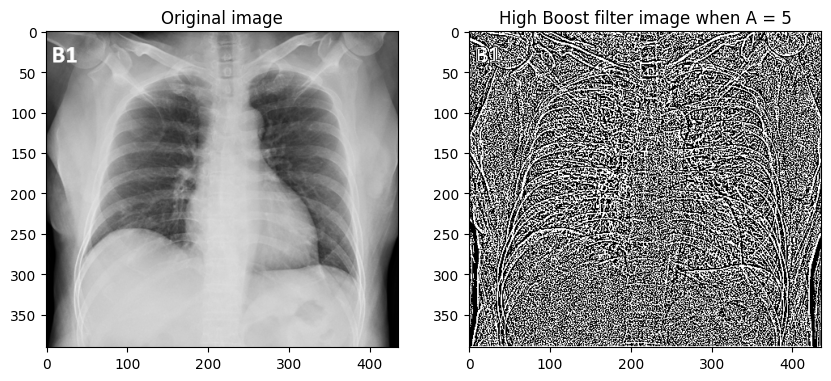

In [82]:
A = 5
kernel_image = high_pass_filter(pad_image, kernel)
high_boost_image = highboost_filter(kernel_image,high_pass_image, A)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title("High Boost filter image when A = 5")
plt.imshow(high_boost_image)
plt.show()

# **Applications**

## **High Pass Filters:**
**Edge Detection**: Enhances edges in images for object recognition and segmentation.  

**Detail Enhancement**: Improves fine details in medical and satellite imagery

**Image Sharpening**: Enhances contrast and clarity by emphasizing
high-frequency details.

## High-Boost Filter:

**Image Enhancement**: Amplifies high-frequency details to improve image sharpness and contrast.

**Feature Extraction**: Enhances features in images for better detection in machine learning and computer vision tasks.

**Noise Reduction**: Reduces noise while preserving important image details by boosting high-frequency components.


## **Observation:**

The high-pass filter enhances the edges and details in the image, making the image sharper.

Increasing the value of A in the high-boost filter amplifies the high-frequency components, further enhancing the edges and details.

# **Conclusions**

High-pass filters and high-boost filters are essential tools for image processing. They play a crucial role in enhancing image details, sharpening edges, and improving overall image quality. By selectively amplifying high-frequency components, these filters enable applications such as edge detection, detail enhancement, and feature extraction. The choice of filter and its parameters depends on the specific image and desired outcome

